<a href="https://colab.research.google.com/github/surapitttha/Python-upskill/blob/main/Support_Vector_Machine_(SVM)_data_set_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('ticks')

##iris Dataset

In [3]:
df =sns.load_dataset('iris')
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
41,4.5,2.3,1.3,0.3,setosa
88,5.6,3.0,4.1,1.3,versicolor
42,4.4,3.2,1.3,0.2,setosa
22,4.6,3.6,1.0,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor


In [4]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
df.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [9]:
# Frequency of Species (target or class)
(label, count) = np.unique(df.species , return_counts=True)
freq = np.asarray((label, count)).T
print(freq)

[['setosa' 50]
 ['versicolor' 50]
 ['virginica' 50]]


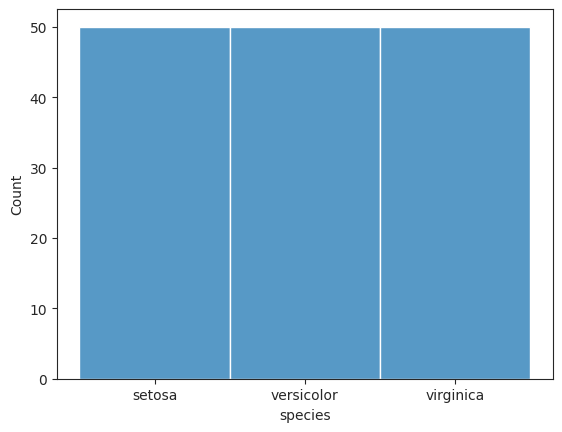

In [10]:
sns.histplot(data=df, x='species')
plt.show()

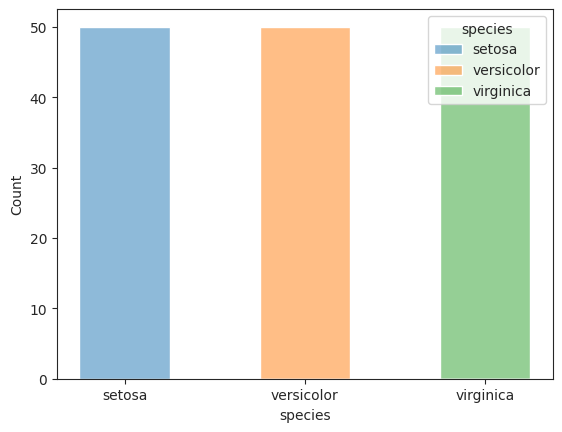

In [11]:
sns.histplot(data=df, x='species', hue='species', shrink=.5)
plt.show()

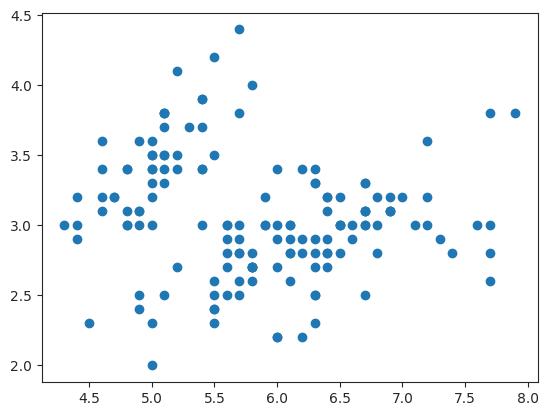

In [12]:
# Scatter plot by Matplotlib
plt.scatter(df.sepal_length, df.sepal_width)
plt.show()

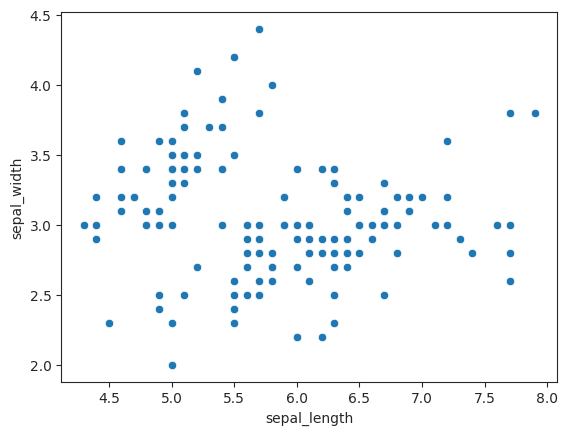

In [13]:
# Seaborn
sns.scatterplot(data=df, x='sepal_length', y='sepal_width')
plt.show()

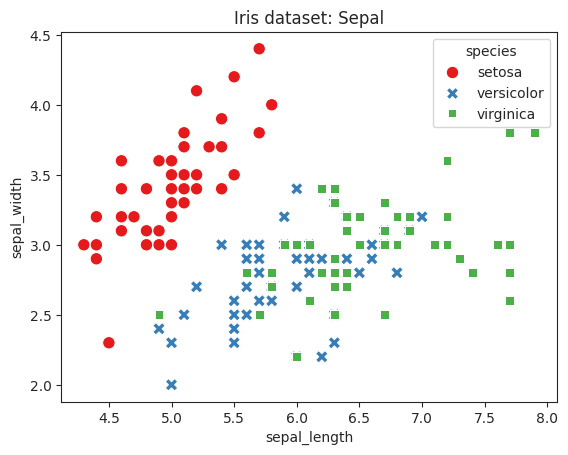

In [14]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width',
                 hue='species',
                 style='species', palette='Set1',
                 s=80)
plt.title('Iris dataset: Sepal')
plt.show()

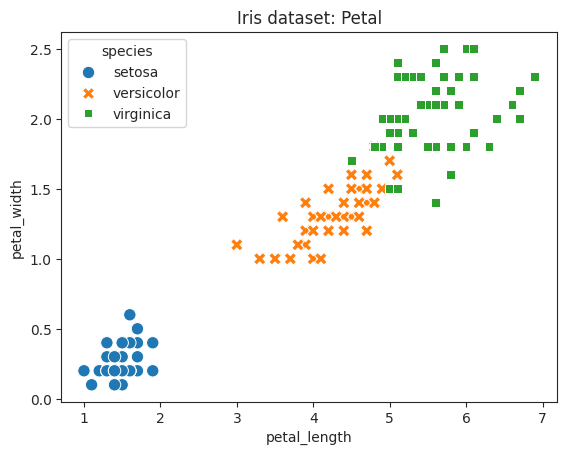

In [15]:
sns.scatterplot(data=df, x='petal_length', y='petal_width',
                 hue='species', style='species', s=80)
plt.title('Iris dataset: Petal')
plt.show()

## KDE
A kernel density estimate (KDE) plot (for visualizing the distribution of observations in a dataset)

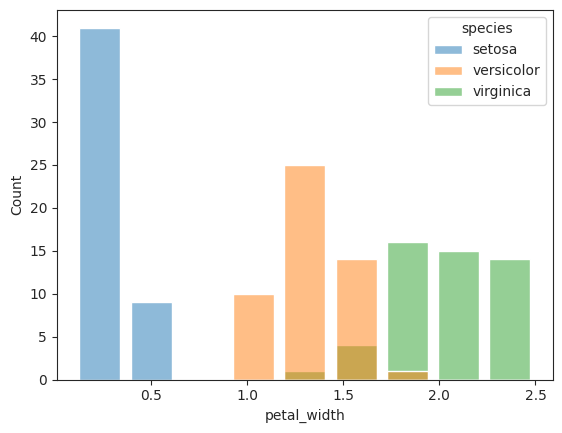

In [16]:
sns.histplot(data=df, x='petal_width', hue='species', shrink=.8)
plt.show()

<ipython-input-17-6aed40083bf6>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='petal_width', hue='species', shade=True)


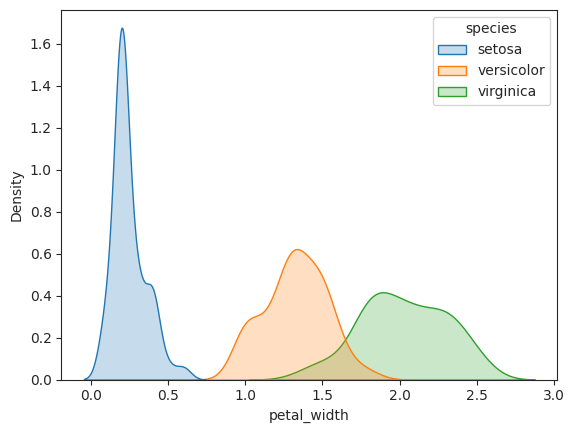

In [17]:
sns.kdeplot(data=df, x='petal_width', hue='species', shade=True)
plt.show()

<ipython-input-18-d1f7b479c2ed>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='sepal_width', hue='species', shade=True)


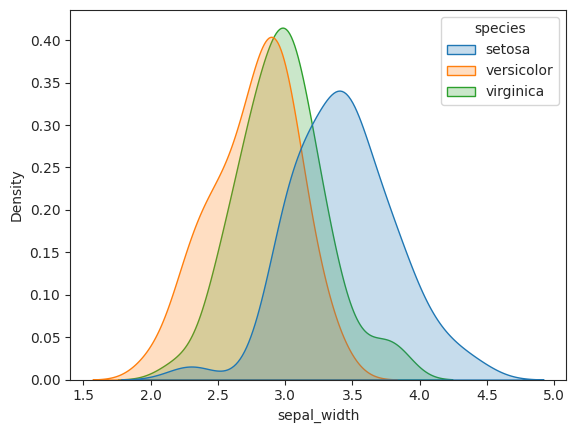

In [18]:
sns.kdeplot(data=df, x='sepal_width', hue='species', shade=True)
plt.show()

## Pairplot

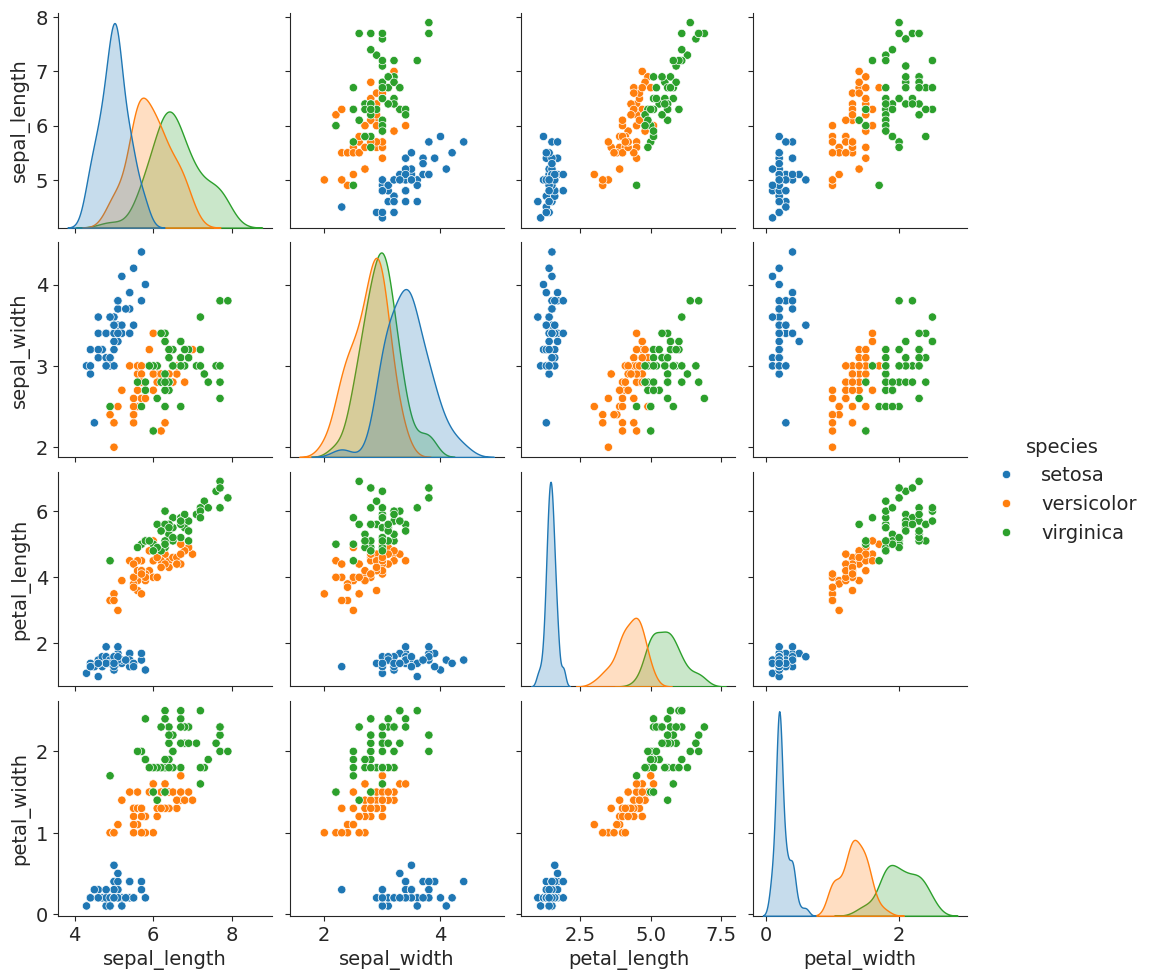

In [19]:
plt.rcParams.update({'font.size':14})
# sns.pairplot(df)
sns.pairplot(df, hue='species')
plt.show()

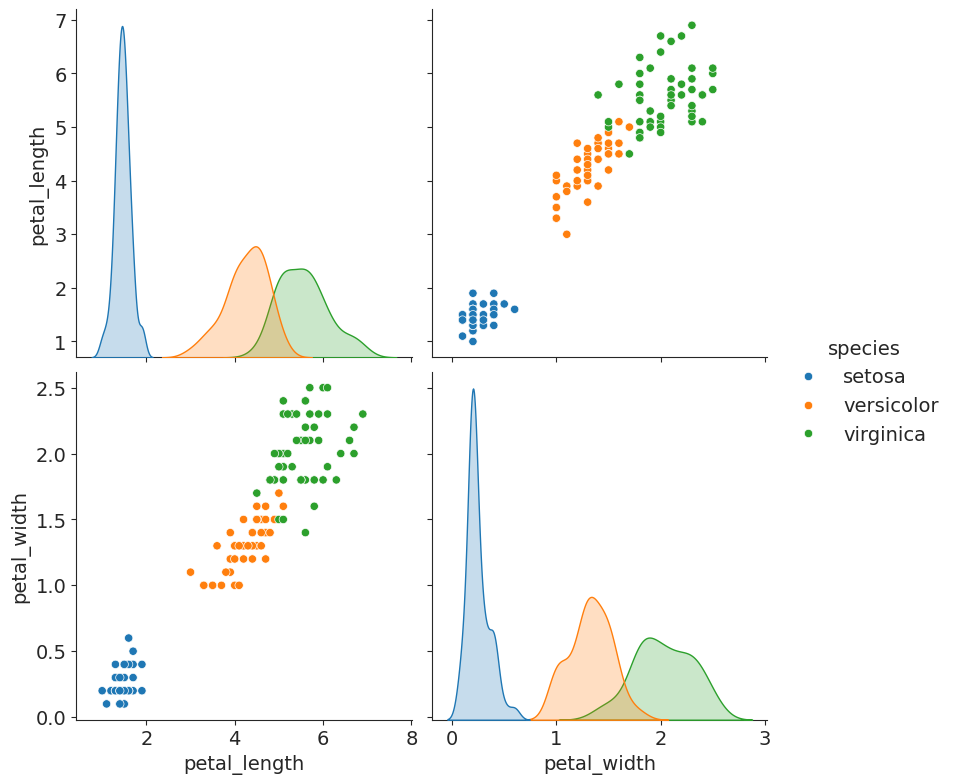

In [20]:
columns = ['petal_length', 'petal_width', 'species']
sns.pairplot(df[columns], hue='species', height=4)
plt.show()

##Prepare (เตรียม) X,y

In [21]:
X = df.drop(['species'],axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Label Encoding

In [22]:
y,class_names = pd.factorize(df.species)

class_names

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

##Train-test Split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X,y)


In [24]:
X_train.shape , X_train.shape

((112, 4), (112, 4))

In [25]:
(label,count) = np.unique(y_test, return_counts=True)
freq = np.asarray((label, count)).T
print(freq)

[[ 0 19]
 [ 1  9]
 [ 2 10]]


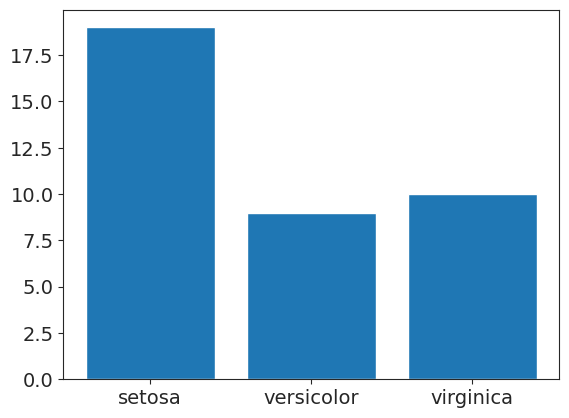

In [26]:
plt.bar(freq[:,0], freq[:,1])
plt.xticks(np.arange(3), class_names)  # Set text labels.
plt.show()

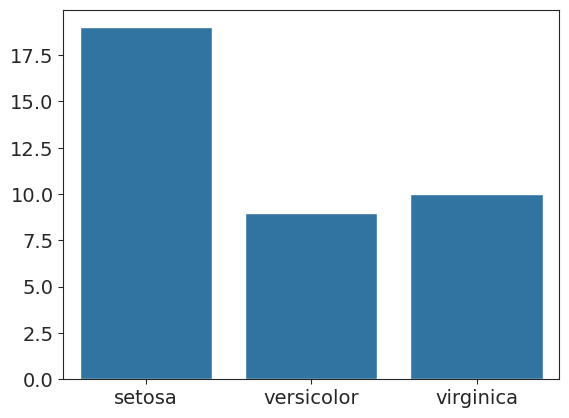

In [27]:
sns.barplot(x=freq[:,0], y=freq[:,1])
plt.xticks(np.arange(3), class_names)
plt.show()

In [28]:
X_train[:5]

,sepal_length,sepal_width,petal_length,petal_width
136,6.3,3.4,5.6,2.4
143,6.8,3.2,5.9,2.3
83,6.0,2.7,5.1,1.6
38,4.4,3.0,1.3,0.2
119,6.0,2.2,5.0,1.5


In [29]:
y_train[:5]

array([2, 2, 1, 0, 2])

Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
model.feature_importances_

array([0.01798763, 0.        , 0.91242394, 0.06958842])

#Tree

In [32]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

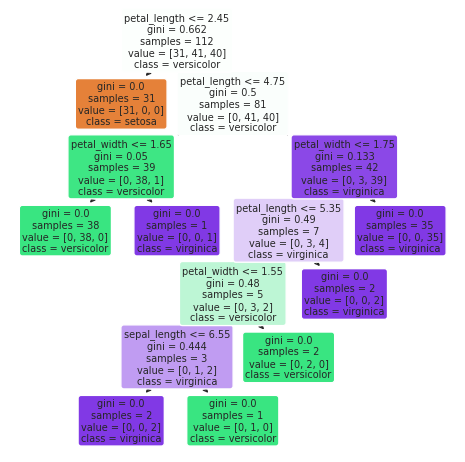

In [33]:
from sklearn.tree import plot_tree
data_feature_names = X.columns
plt.subplots(nrows=1,ncols=1,figsize=(6,6),dpi=96)

plot_tree(model,
          filled=True,rounded=True,
          feature_names=data_feature_names,
          class_names=class_names)

plt.show()

##Evaluation

In [34]:
score = model.score(X_test, y_test)
print('Score =', score.round(3))

Score = 0.947


In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

print('Score : {:.3f}'.format(model.score(X_test,y_test)))
print('Accuracy Score :',accuracy_score(y_test,y_pred).round(3))

print(classification_report(y_test,y_pred,target_names=class_names))

cm = confusion_matrix(y_test,y_pred)

print(cm)

Score : 0.947
Accuracy Score : 0.947
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.78      0.88         9
   virginica       0.83      1.00      0.91        10

    accuracy                           0.95        38
   macro avg       0.94      0.93      0.93        38
weighted avg       0.96      0.95      0.95        38

[[19  0  0]
 [ 0  7  2]
 [ 0  0 10]]


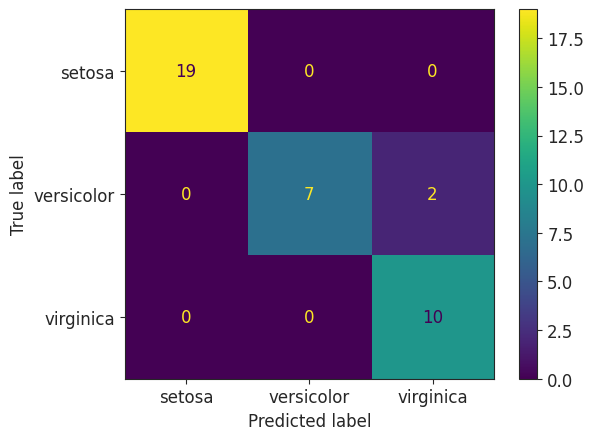

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rcParams.update({'font.size':12})

ConfusionMatrixDisplay(cm,display_labels=class_names).plot()
plt.show()

#Miss-classification

In [37]:
y_pred = model.predict(X_test)

In [38]:
dy = pd.DataFrame()

dy['y_test'] = y_test
dy['y_pred'] = y_pred

dy['result'] = y_test == y_pred

In [39]:
dy.head()

,y_test,y_pred,result
0,0,0,True
1,0,0,True
2,2,2,True
3,1,1,True
4,2,2,True


In [40]:
dy.groupby('result').count()

,y_test,y_pred
result,,
False,2,2
True,36,36


In [41]:
dy[dy.result == False]

,y_test,y_pred,result
29,1,2,False
30,1,2,False


In [42]:
print("Miss-classification:", len(y_test[(y_test != y_pred)]) )

Miss-classification: 2


##Predict

In [43]:
X_new = np.array([[4.2, 4.0, 1.9, 0.8],     #
                  [6.1, 3.5, 3.9, 1.5],     #
                  [6.7, 3.5, 6.3, 1.4]])    #

y_pred = model.predict(X_new)
y_pred
# print(class_names[y_pred][0])
for i in y_pred:
    print(class_names[i])

setosa
versicolor
virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


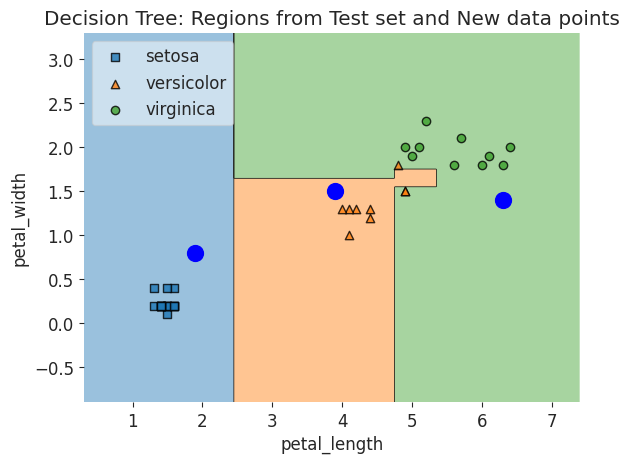

In [44]:
# จาก Test-set และ New data points (ที่ Predict)

from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(np.array(X_test), y_test,
                      clf=model, feature_index=[2, 3],  # Petal Length-Width
                      filler_feature_values={0: value, 1: value},
                      filler_feature_ranges={0: width, 1: width},
                      legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('Decision Tree: Regions from Test set and New data points')

plt.xticks()
plt.yticks()
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[3])

plt.scatter(X_new[:,2], X_new[:,3], marker='o', s=130, c='b')
plt.show()

##Support Vectot Machine

In [45]:
from sklearn.svm import SVC

model = SVC(kernel='linear')

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.3, random_state=20)

model.fit(X_train,y_train)

SVC(kernel='linear')

In [48]:
y_pred = model.predict(X_test)

print('Score : {:.4f}'. format(accuracy_score(y_test,y_pred)))

print(classification_report(y_test,y_pred,target_names=class_names))

print(confusion_matrix(y_test,y_pred))

Score : 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      1.00      0.92        18
   virginica       1.00      0.79      0.88        14

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

[[13  0  0]
 [ 0 18  0]
 [ 0  3 11]]


###Predict

In [49]:
y_pred = model.predict(X_new)
y_pred
# print(class_names[y_pred][0])
for i in y_pred:
    print(class_names[i])

setosa
versicolor
virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### Confusion Matrix

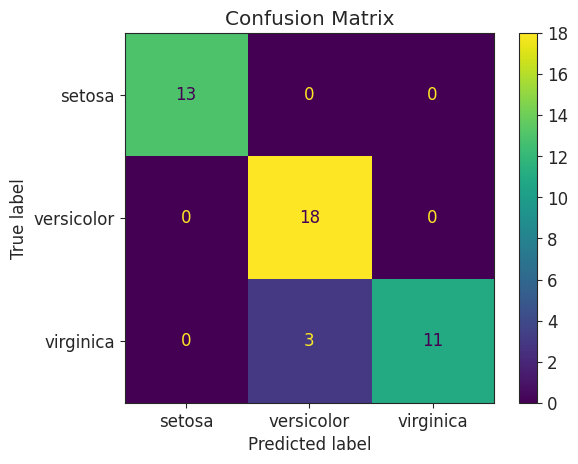

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.rcParams.update({'font.size':12})
# labels = df.species.unique() #

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot() # cmap='Pastel1'
plt.title('Confusion Matrix')
plt.show()

### Decision Regions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


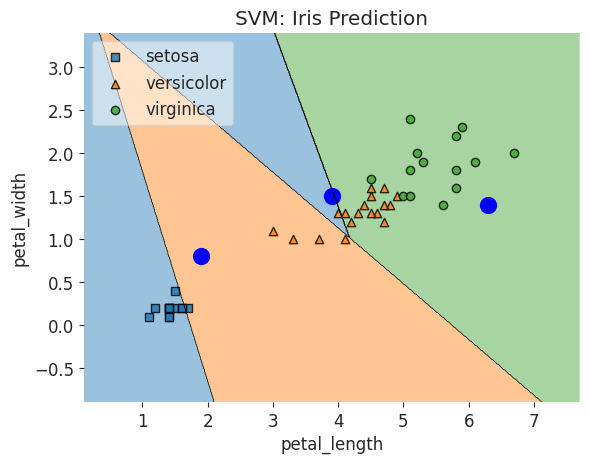

In [51]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(np.array(X_test), y_test,
                      clf=model, feature_index=[2, 3],
                      filler_feature_values={0: value, 1: value},
                      filler_feature_ranges={0: width, 1: width},
                      legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('SVM: Iris Prediction')

# plt.xticks([])
# plt.yticks([])
plt.xlabel(df.columns[2])
plt.ylabel(df.columns[3])

plt.scatter(X_new[:,2], X_new[:,3], marker='o', s=130, c='b')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


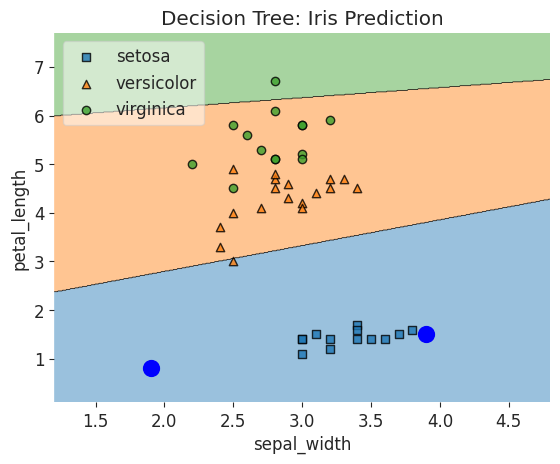

In [52]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(np.array(X_test), y_test,
                      clf=model, feature_index=[1, 2],
                      filler_feature_values={0: value, 3: value},
                      filler_feature_ranges={0: width, 3: width},
                      legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('Decision Tree: Iris Prediction')

plt.xticks()
plt.yticks()
plt.xlabel(df.columns[1])
plt.ylabel(df.columns[2])

plt.scatter(X_new[:,2], X_new[:,3], marker='o', s=130, c='b')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


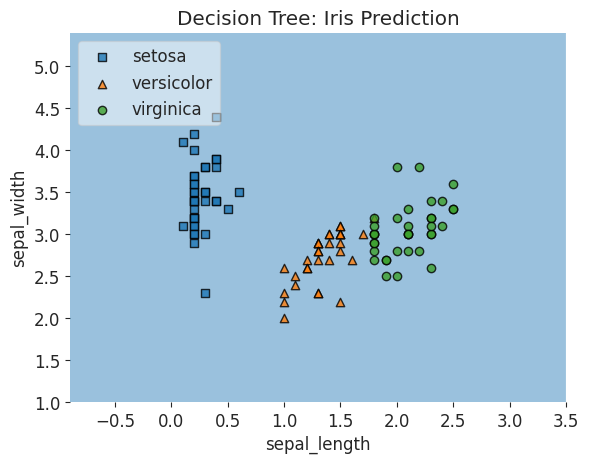

In [53]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(np.array(X_train), y_train,
                      clf=model, feature_index=[3, 1],
                      filler_feature_values={0: value, 2: value},
                      filler_feature_ranges={0: width, 2: width},
                      legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('Decision Tree: Iris Prediction')

plt.xticks()
plt.yticks()
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])

plt.scatter(X_new[:,2], X_new[:,3], marker='o', s=130, c='b')
plt.show()

# PCA
เปลี่ยน 4 features -> 2 features เพื่อ plot x-y graph

In [54]:
X_train.shape , y_train.shape

((105, 4), (105,))

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.3, random_state=20)

In [57]:
X_train.shape , X_test.shape

((105, 2), (45, 2))

## Model

In [58]:
model = SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC()

In [59]:
y_pred = model.predict(X_test)

print('Score : {:.4f}'. format(accuracy_score(y_test,y_pred)))

Score : 0.9556


## Decision Regions

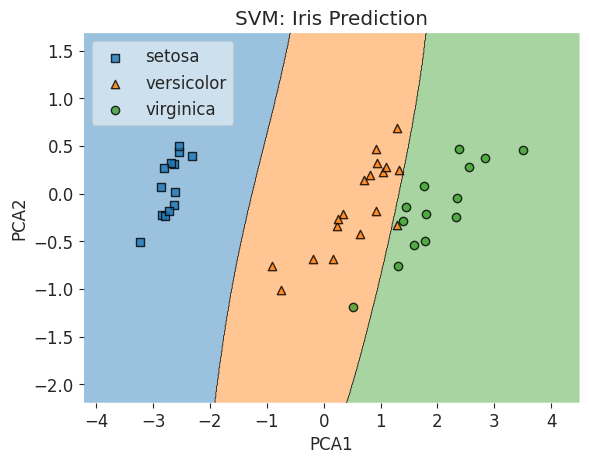

In [60]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(np.array(X_test), y_test,
                      clf=model,
                      legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('SVM: Iris Prediction')

plt.xticks()
plt.yticks()
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.show()

In [61]:
X_new_pca = pca.transform(X_new)
X_new_pca

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-2.40832599, -0.03842687],
       [ 0.28471344,  0.44442903],
       [ 2.52172593,  0.42983601]])

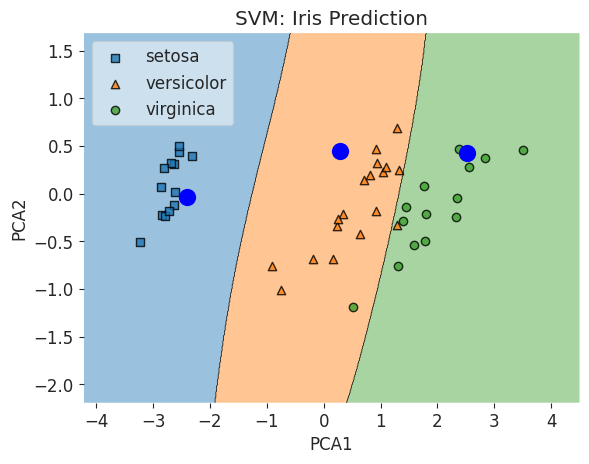

In [62]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(np.array(X_test), y_test,
                      clf=model,
                      legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('SVM: Iris Prediction')

plt.xticks()
plt.yticks()
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.scatter(X_new_pca[:,0], X_new_pca[:,1], marker='o', s=130, c='b')
plt.show()

## Predict

In [63]:
y_pred = model.predict(X_new_pca)
for i in y_pred:
    print(class_names[i])

setosa
versicolor
virginica


# Cross Validation

In [64]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model = SVC(kernel='linear') #

cvs = cross_val_score(model, X, y, cv=5)  # no need to use model.fit
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100 ))

cross val scores [0.97 1.   0.97 0.97 1.  ]
Average (%) = 98.00


In [65]:
model.fit(X, y)

SVC(kernel='linear')

In [66]:
X_new = np.array([[4.2, 4.0, 1.9, 0.8],     # setosa
                  [6.1, 3.5, 3.9, 1.5],     # versicolor
                  [6.7, 3.5, 6.3, 1.4]])    #

y_pred = model.predict(X_new)
y_pred
# print(class_names[y_pred][0])
for i in y_pred:
    print(class_names[i])

setosa
versicolor
virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
